In [ ]:
#This file contains code for performing QC and normalization of the single cell data. 
#after normalization, the data is filtered into LowIP and highIP according to the lowIP and highIP gruops made in the previous code (LowIP and HighIP).

In [95]:
import scanpy as sc
import anndata as ad
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
# Load UMI count matrix
count_matrix = pd.read_csv('GSE132465_GEO_processed_CRC_10X_raw_UMI_count_matrix-Copy1.txt.gz', index_col=0, sep='\t')

In [97]:
count_matrix=count_matrix.transpose()

In [98]:
#Loading the high immuno and low immuno datasets with annotation
combined_low_immuno = pd.read_csv('Combined_low_immuno.csv')
combined_high_immuno = pd.read_csv('Combined_high_immuno.csv')
combined_low_immuno.set_index('Index', inplace=True)
combined_high_immuno.set_index('Index', inplace=True)

In [7]:
#LowIP_countmatrix_array = filtered_low_immuno.to_numpy(dtype=float)
#HighIP_countmatrix_array = filtered_high_immuno.to_numpy(dtype=float)

In [39]:
#Filtering UMI count matrix for low immuno cells
#filtered_low_immuno = count_matrix.loc[count_matrix.index.isin(combined_low_immuno.index)]
#filtered_high_immuno = count_matrix.loc[count_matrix.index.isin(combined_high_immuno.index)]

In [44]:
#assigning lowIP and HighIP count matrix to AnnData
#adata_LowIP = sc.AnnData(filtered_low_immuno)
#adata_HighIP = sc.AnnData(filtered_high_immuno)

In [99]:
adata=sc.AnnData(count_matrix)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [45]:
#pre-processing of scRNA seq data
#sc.pp.filter_cells(adata_HighIP, min_genes=200)
#sc.pp.filter_cells(adata_LowIP, min_genes=200)
#sc.pp.filter_genes(adata_LowIP, min_cells=3)
#sc.pp.filter_genes(adata_HighIP, min_cells=3)

In [100]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

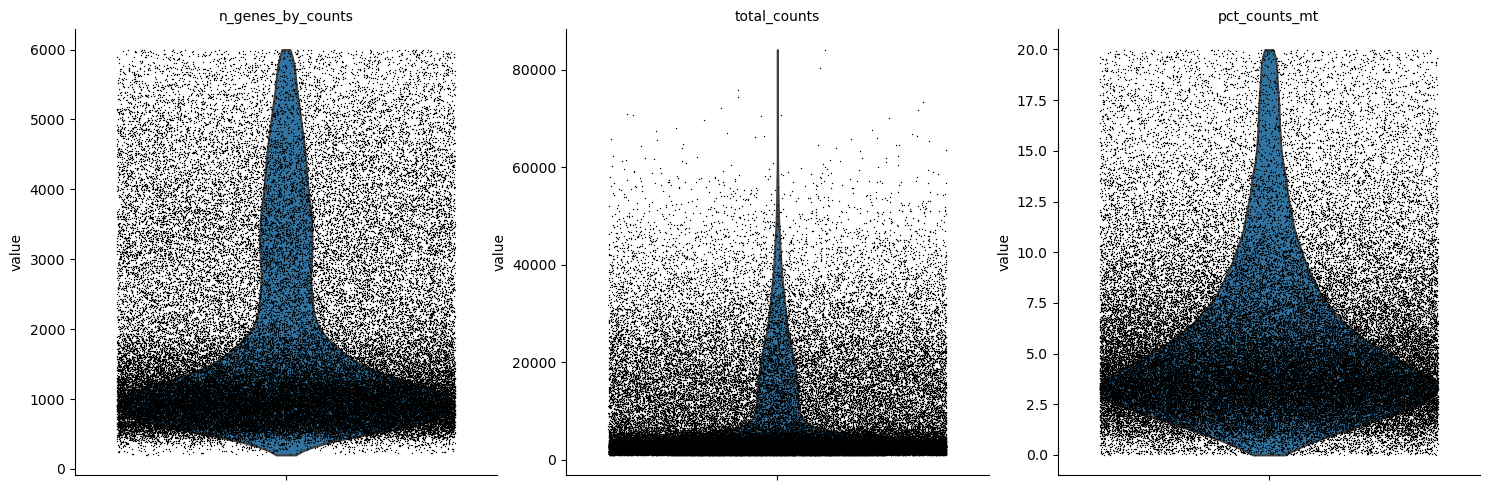

In [101]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

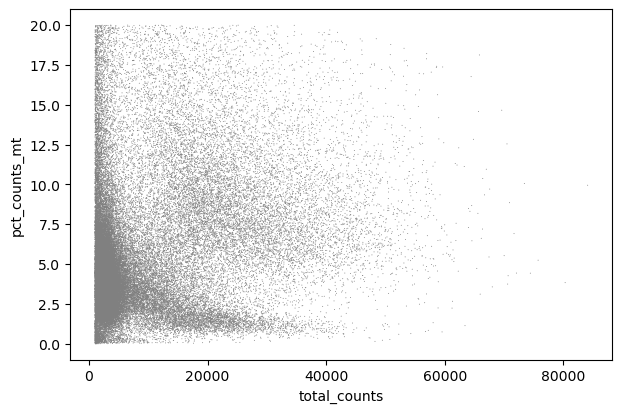

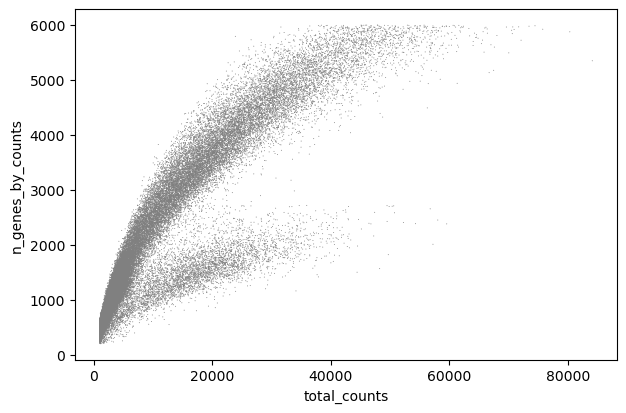

In [102]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [103]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [104]:
index_to_filter_on = combined_low_immuno.index

# Create a boolean mask based on the index values
mask = adata.obs.index.isin(index_to_filter_on)

# Use the mask to filter adata
filtered_adata_lowIP = adata[mask]

In [105]:
index_to_filter_on = combined_high_immuno.index

# Create a boolean mask based on the index values
mask = adata.obs.index.isin(index_to_filter_on)

# Use the mask to filter adata
filtered_adata_highIP = adata[mask]

In [111]:
#Checking the datamatrix
#filtered_adata_lowIP
filtered_adata_highIP

AnnData object with n_obs × n_vars = 34184 × 25655
    obs: 'Immunoproteasome', 'Cell_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

In [110]:
#Assigning annotation to the AnnData 
filtered_adata_lowIP.obs = combined_low_immuno
filtered_adata_highIP.obs = combined_high_immuno

In [112]:
filtered_adata_lowIP

AnnData object with n_obs × n_vars = 34184 × 25655
    obs: 'Immunoproteasome', 'Cell_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

In [113]:
filtered_adata_highIP

AnnData object with n_obs × n_vars = 34184 × 25655
    obs: 'Immunoproteasome', 'Cell_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

In [114]:
sc.pp.pca(filtered_adata_lowIP)
sc.pp.pca(filtered_adata_highIP)

In [115]:
pca_components = filtered_adata_lowIP.obsm["X_pca"]

/home/guest/miniconda3/envs/lianaproject/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


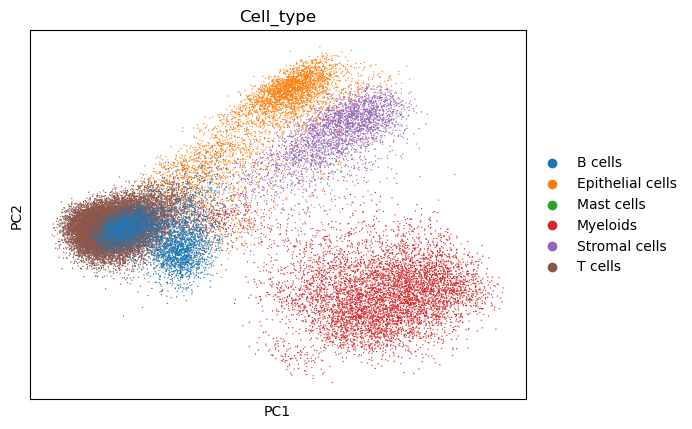

In [116]:
sc.pl.pca(filtered_adata_lowIP, color="Cell_type")

/home/guest/miniconda3/envs/lianaproject/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


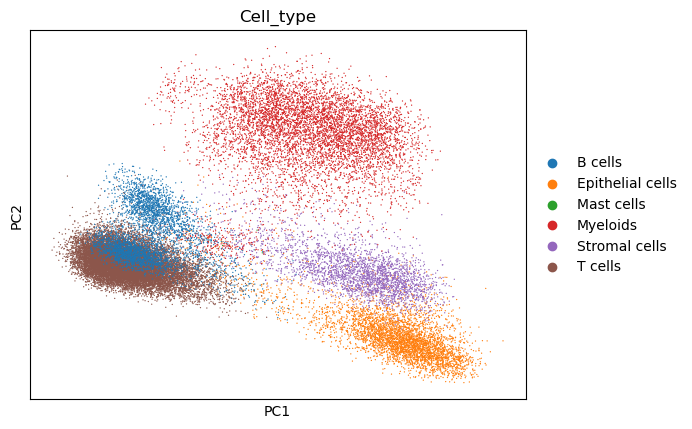

In [117]:
pca_components = filtered_adata_highIP.obsm["X_pca"]
sc.pl.pca(filtered_adata_highIP, color="Cell_type")

In [118]:
sc.pp.neighbors(filtered_adata_lowIP)
sc.pp.neighbors(filtered_adata_highIP)

/home/guest/miniconda3/envs/lianaproject/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


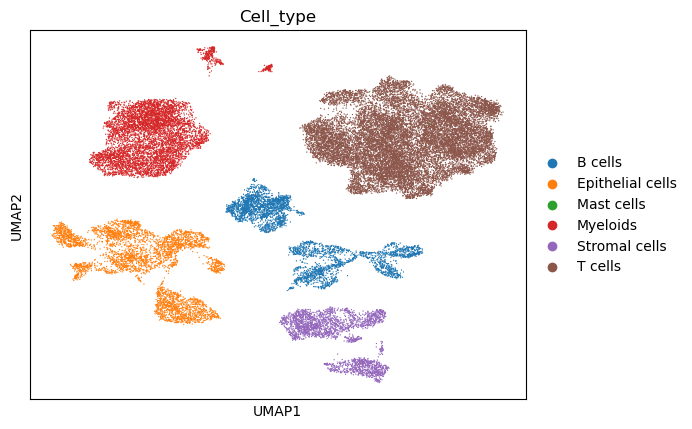

In [119]:
sc.tl.umap(filtered_adata_lowIP)
sc.pl.umap(filtered_adata_lowIP, color=['Cell_type'])

/home/guest/miniconda3/envs/lianaproject/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


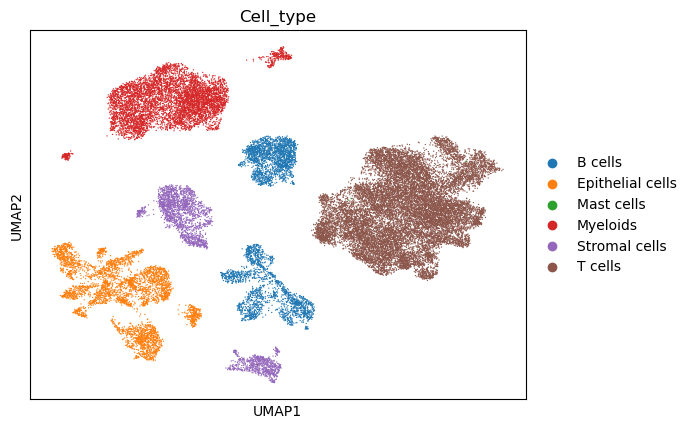

In [120]:
sc.tl.umap(filtered_adata_highIP)
sc.pl.umap(filtered_adata_highIP, color=['Cell_type'])

In [121]:
filtered_adata_lowIP

AnnData object with n_obs × n_vars = 34184 × 25655
    obs: 'Immunoproteasome', 'Cell_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'Cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [122]:
filtered_adata_highIP

AnnData object with n_obs × n_vars = 34184 × 25655
    obs: 'Immunoproteasome', 'Cell_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca', 'Cell_type_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [65]:
%pwd

'/home/guest/Disha/Liana code'

In [123]:
#Saving the AnnData files
file_path = "/home/guest/Disha/Liana code/ColonscRNAseq_pro_LowIP.h5ad"
filtered_adata_lowIP.write_h5ad(file_path)
file_path_1 = "/home/guest/Disha/Liana code/ColonscRNAseq_pro_HighIP.h5ad"
filtered_adata_highIP.write_h5ad(file_path_1)